Importing Libraries and Dataset 📁

In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras import layers, models

In [2]:
# Define constants
DATA_DIR = '/content/drive/MyDrive/images/'
EMOTIONS = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprised']
IMG_SIZE = 48

Load and Preprocess images


In [3]:
# Function to load and preprocess images
def load_data():
    images = []
    labels = []

    for emotion_label, emotion in enumerate(EMOTIONS):
        emotion_dir = os.path.join(DATA_DIR, str(emotion_label))
        if os.path.isdir(emotion_dir):
            for img_file in os.listdir(emotion_dir):
                img_path = os.path.join(emotion_dir, img_file)
                img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                images.append(img_resized)
                labels.append(emotion_label)
        else:
            print(f"Directory not found for emotion {emotion}: {emotion_dir}")

    return np.array(images), np.array(labels)

In [4]:
# Load the data
images, labels = load_data()

In [5]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [6]:
# Normalize the pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape data for CNN input
X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

Visualization Of Images

Number of images: 64
Shape of images array: (64, 48, 48)
Number of labels: 64


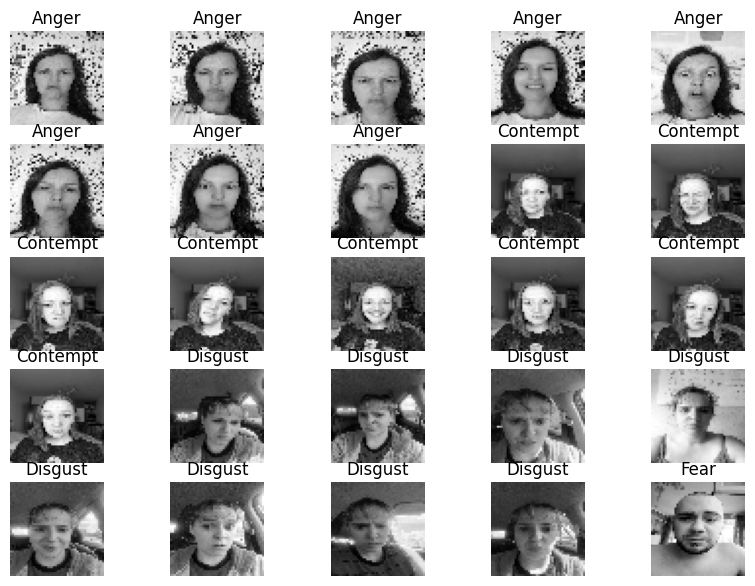

In [9]:
# Print information about the dataset
print("Number of images:", len(images))
print("Shape of images array:", images.shape)
print("Number of labels:", len(labels))

# Print sample images and their corresponding labels
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(7, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(EMOTIONS[labels[i]])
    plt.axis('off')
plt.show()

Data augmentation

In [10]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

Create Model for Facial Recognition

In [69]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout layer to prevent overfitting
    layers.Dense(len(EMOTIONS), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_64 (Conv2D)                   │ (None, 46, 46, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_64 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_65 (Conv2D)                   │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_65 (MaxPooling2D)      │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_66 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_66 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_26 (Flatten)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_78 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 485,384 (1.85 MB)

 Trainable params: 485,384 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [71]:
# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 328ms/step - accuracy: 0.1441 - loss: 2.0397 - val_accuracy: 0.2308 - val_loss: 2.0434
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.2741 - loss: 2.0535 - val_accuracy: 0.2308 - val_loss: 2.0431
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.3103 - loss: 1.9793 - val_accuracy: 0.2308 - val_loss: 2.0494
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - accuracy: 0.1397 - loss: 2.0801 - val_accuracy: 0.3077 - val_loss: 2.0178
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 280ms/step - accuracy: 0.3144 - loss: 1.9389 - val_accuracy: 0.3077 - val_loss: 1.9880
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.2841 - loss: 1.9589 - val_accuracy: 0.3077 - val_loss: 1.9392
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 209ms/step - accuracy: 0.3107 - loss: 1.9335 - val_accuracy: 0.3077 - val_loss: 1.8602
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 253ms/step - accuracy: 0.2167 - loss: 1.9548 - val_accuracy: 0.3846 - val_loss:

Visualize model performance

In [73]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

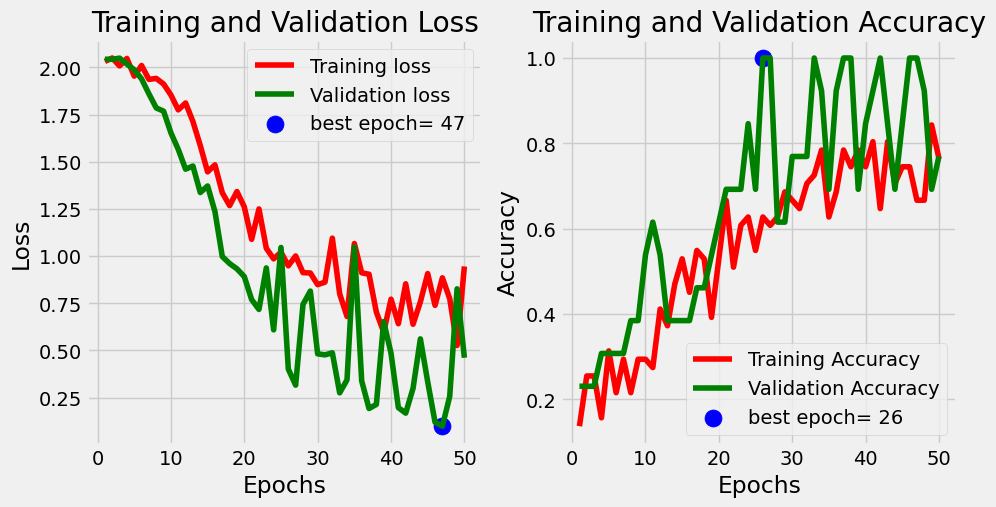

In [75]:
# Plot training history
plt.figure(figsize= (10,5))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

Evaluate model

In [76]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

1/1 - 0s - 45ms/step - accuracy: 0.7692 - loss: 0.4615
Test Loss: 0.4615233540534973
Test Accuracy: 0.7692307829856873


In [77]:
from sklearn.metrics import classification_report

# Make predictions on the test set
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Print classification report
print(classification_report(y_test, predicted_labels, target_names=EMOTIONS))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
              precision    recall  f1-score   support

       Anger       0.67      1.00      0.80         2
    Contempt       1.00      1.00      1.00         2
     Disgust       1.00      1.00      1.00         1
        Fear       0.00      0.00      0.00         1
       Happy       1.00      1.00      1.00         1
     Neutral       0.00      0.00      0.00         2
         Sad       0.33      1.00      0.50         1
   Surprised       1.00      1.00      1.00         3

    accuracy                           0.77        13
   macro avg       0.62      0.75      0.66        13
weighted avg       0.67      0.77      0.70        13



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


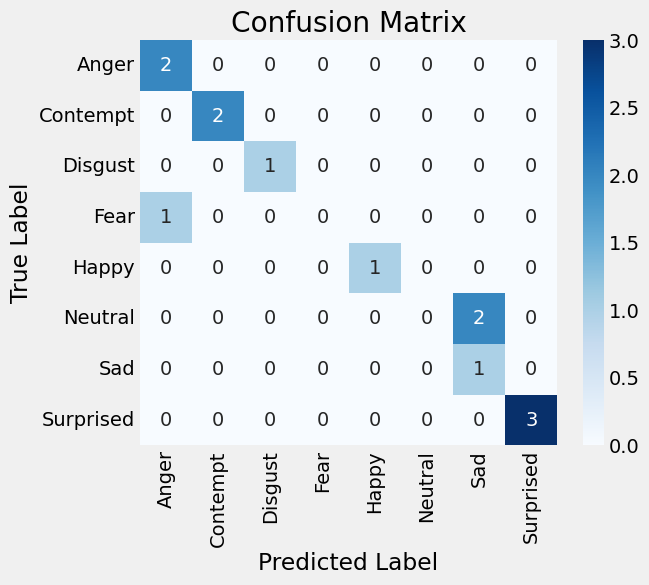

In [78]:
# Make predictions on the test set
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=EMOTIONS, yticklabels=EMOTIONS)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


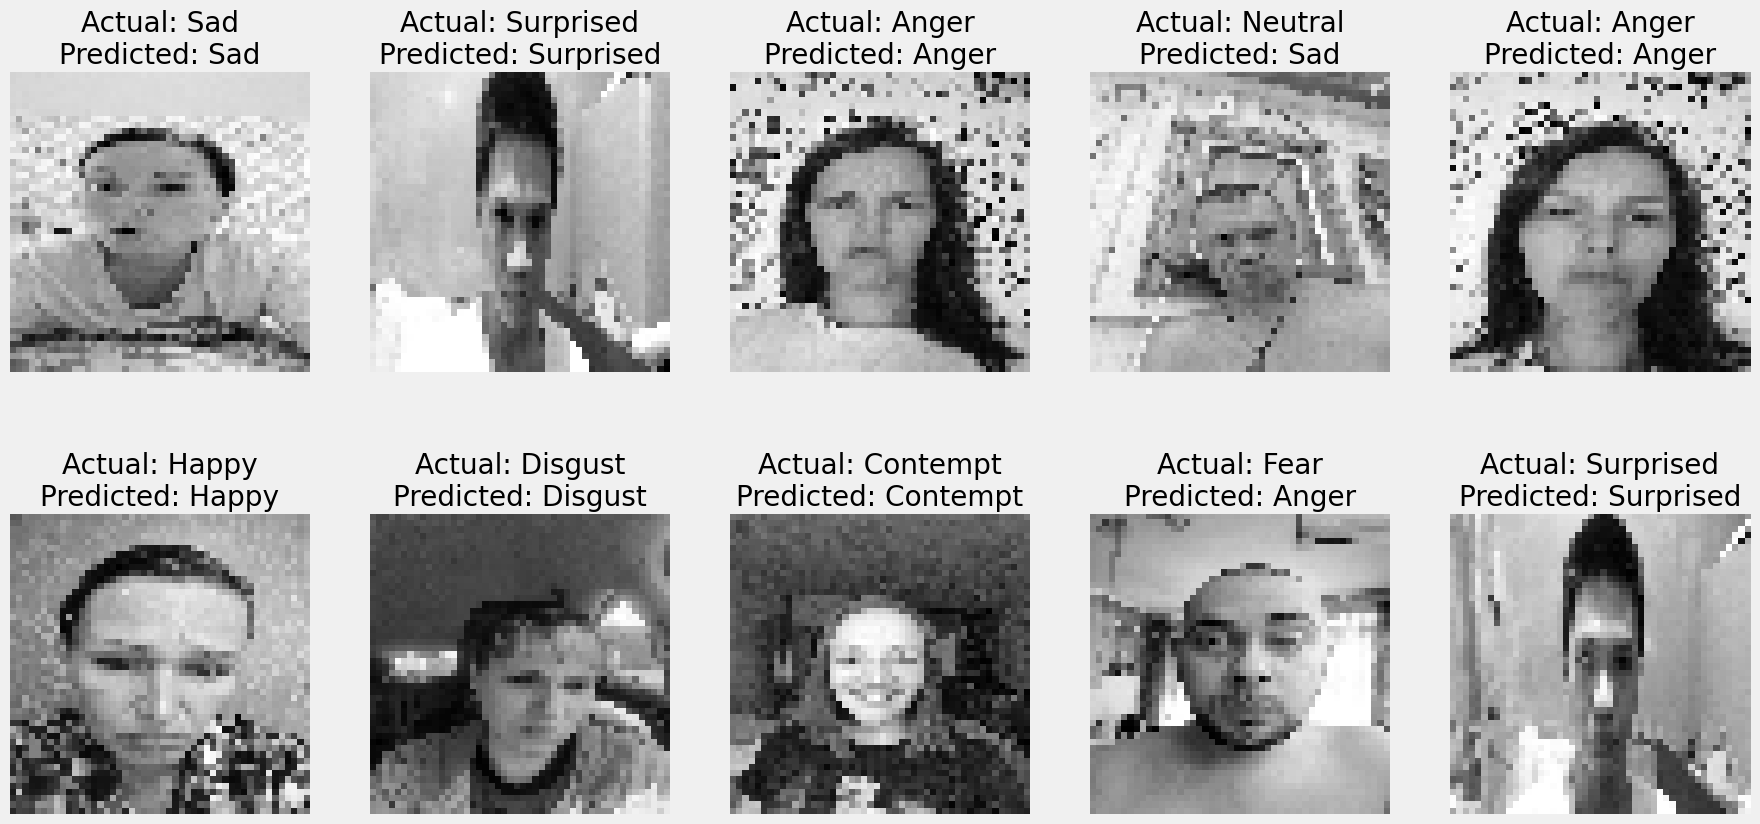

In [79]:
import matplotlib.pyplot as plt

# Make predictions on the test set
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Function to display images with predicted and actual labels
def display_images(images, actual_labels, predicted_labels, emotions, num_images=10):
    plt.figure(figsize=(20,10))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        # Since the images are grayscale, we reshape them to (48, 48)
        img = images[i].reshape(IMG_SIZE, IMG_SIZE)
        plt.imshow(img, cmap='gray')
        plt.title(f"Actual: {emotions[actual_labels[i]]}\nPredicted: {emotions[predicted_labels[i]]}")
        plt.axis('off')
    plt.show()

# Display the images with predicted and actual labels
display_images(X_test, y_test, predicted_labels, EMOTIONS)

Testing the model with Image url with wellness recomendations

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step
Predicted Emotion: Sad
Wellness Suggestion: Reach out to a friend or loved one for support.


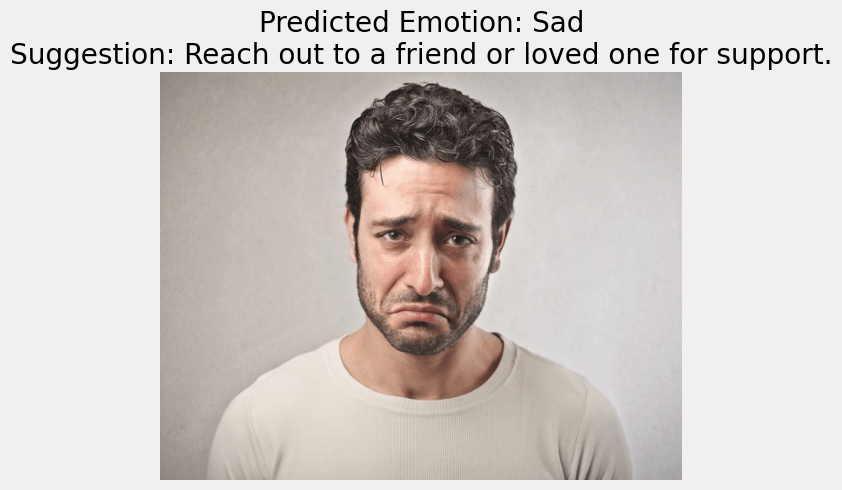

In [94]:
import cv2
import numpy as np
import tensorflow as tf
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt  # Import Matplotlib for displaying images

# Load the trained model
model = tf.keras.models.load_model('/content/best_model.keras')  # Update with your model path

# Define constants
EMOTIONS = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprised']
IMG_SIZE = 48

# Function to preprocess the image for prediction
def preprocess_image(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    resized_image = cv2.resize(gray_image, (IMG_SIZE, IMG_SIZE))  # Resize to model input size
    normalized_image = resized_image / 255.0  # Normalize the pixel values
    reshaped_image = normalized_image.reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # Reshape for the model
    return reshaped_image

# Function to get wellness suggestions based on the predicted emotion
def get_suggestion(predicted_emotion):
    suggestions = {
        'Anger': "Take deep breaths and try to calm down.",
        'Contempt': "Focus on the positive aspects of your surroundings.",
        'Disgust': "Engage in activities that bring you joy.",
        'Fear': "Practice grounding techniques or talk to someone you trust.",
        'Happy': "Enjoy the moment and spread positivity!",
        'Neutral': "Take a break and refresh your mind.",
        'Sad': "Reach out to a friend or loved one for support.",
        'Surprised': "Embrace the unexpected and explore new opportunities."
    }
    return suggestions.get(predicted_emotion, "Stay positive!")

# Function to load an image from a URL
def load_image_from_url(url):
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))
    image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)  # Convert to OpenCV format
    return image

# Input image URL
image_url = 'https://www.shutterstock.com/image-photo/portrait-sad-man-600nw-126009806.jpg'  # Replace with your image URL

# Load and preprocess the image
input_image = load_image_from_url(image_url)
processed_image = preprocess_image(input_image)

# Predict emotion
predictions = model.predict(processed_image)
predicted_label = EMOTIONS[np.argmax(predictions)]

# Get wellness suggestion
suggestion = get_suggestion(predicted_label)

# Display the result
print(f"Predicted Emotion: {predicted_label}")
print(f"Wellness Suggestion: {suggestion}")

# Display the input image with the prediction and suggestion
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.title(f"Predicted Emotion: {predicted_label}\nSuggestion: {suggestion}")
plt.axis('off')  # Hide axes
plt.show()


In [103]:
# Check the shape of the processed image
print(f"Processed image shape: {processed_image.shape}")

# Predict emotion
predictions = model.predict(processed_image)

# Check raw prediction values
print(f"Raw predictions: {predictions}")

predicted_label_index = np.argmax(predictions)
predicted_label = EMOTIONS[predicted_label_index]

# Print the index of the predicted emotion
print(f"Predicted Emotion Index: {predicted_label_index}")

Processed image shape: (1, 48, 48, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Raw predictions: [[0.12132588 0.11314704 0.1212829  0.12926827 0.12259694 0.13114011
  0.13090736 0.13033147]]
Predicted Emotion Index: 5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
Predicted Emotion: Neutral
Wellness Suggestion: Take a break and refresh your mind.


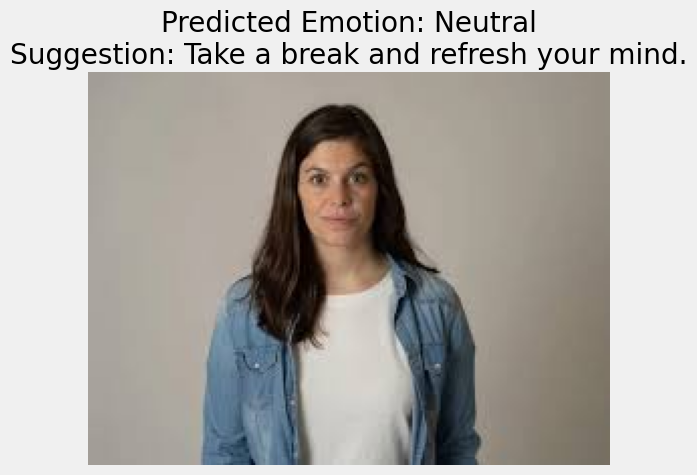

In [104]:
import cv2
import numpy as np
import tensorflow as tf
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt  # Import Matplotlib for displaying images

# Load the trained model
model = tf.keras.models.load_model('/content/best_model.keras')  # Update with your model path

# Define constants
EMOTIONS = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprised']
IMG_SIZE = 48

# Function to preprocess the image for prediction
def preprocess_image(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    resized_image = cv2.resize(gray_image, (IMG_SIZE, IMG_SIZE))  # Resize to model input size
    normalized_image = resized_image / 255.0  # Normalize the pixel values
    reshaped_image = normalized_image.reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # Reshape for the model
    return reshaped_image

# Function to get wellness suggestions based on the predicted emotion
def get_suggestion(predicted_emotion):
    suggestions = {
        'Anger': "Take deep breaths and try to calm down.",
        'Contempt': "Focus on the positive aspects of your surroundings.",
        'Disgust': "Engage in activities that bring you joy.",
        'Fear': "Practice grounding techniques or talk to someone you trust.",
        'Happy': "Enjoy the moment and spread positivity!",
        'Neutral': "Take a break and refresh your mind.",
        'Sad': "Reach out to a friend or loved one for support.",
        'Surprised': "Embrace the unexpected and explore new opportunities."
    }
    return suggestions.get(predicted_emotion, "Stay positive!")

# Function to load an image from a URL
def load_image_from_url(url):
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))
    image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)  # Convert to OpenCV format
    return image

# Input image URL
image_url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR1dhAGbqMDQfVbLNmnnVA_uPr9u5WJ136SpQ&s'  # Replace with your image URL

# Load and preprocess the image
input_image = load_image_from_url(image_url)
processed_image = preprocess_image(input_image)

# Predict emotion
predictions = model.predict(processed_image)
predicted_label = EMOTIONS[np.argmax(predictions)]

# Get wellness suggestion
suggestion = get_suggestion(predicted_label)

# Display the result
print(f"Predicted Emotion: {predicted_label}")
print(f"Wellness Suggestion: {suggestion}")

# Display the input image with the prediction and suggestion
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.title(f"Predicted Emotion: {predicted_label}\nSuggestion: {suggestion}")
plt.axis('off')  # Hide axes
plt.show()


In [105]:
# Check the shape of the processed image
print(f"Processed image shape: {processed_image.shape}")

# Predict emotion
predictions = model.predict(processed_image)

# Check raw prediction values
print(f"Raw predictions: {predictions}")

predicted_label_index = np.argmax(predictions)
predicted_label = EMOTIONS[predicted_label_index]

# Print the index of the predicted emotion
print(f"Predicted Emotion Index: {predicted_label_index}")


Processed image shape: (1, 48, 48, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Raw predictions: [[0.12132588 0.11314704 0.1212829  0.12926827 0.12259694 0.13114011
  0.13090736 0.13033147]]
Predicted Emotion Index: 5
